In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
row=len(df.axes[0])
row


1000

In [6]:
column=len(df.axes[1])
column

17

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**There are no null values in the dataset.**

In [8]:
df.head(15)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


<AxesSubplot:ylabel='Total'>

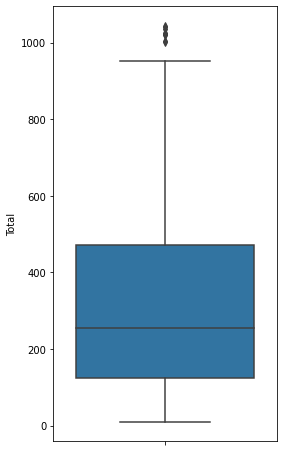

In [9]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.Total)

<AxesSubplot:ylabel='cogs'>

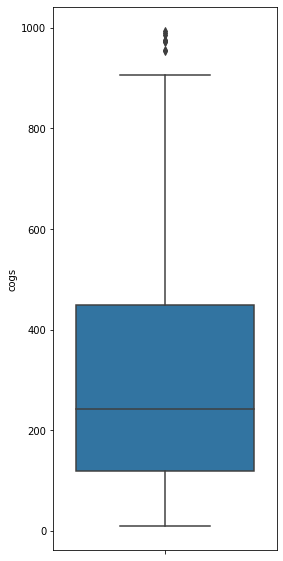

In [10]:
plt.figure(figsize = (4,10))
sns.boxplot(y = df.cogs)

In [11]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [12]:
outliers = find_outliers_IQR(df["Total"])

print("number of outliers: "+ str(len(outliers)))

number of outliers: 9


In [13]:
outliers = find_outliers_IQR(df["cogs"])

print("number of outliers: "+ str(len(outliers)))

number of outliers: 9


**Inconsistent ,Incorrect data**

In [14]:
df['gross margin percentage'].duplicated()

0      False
1       True
2       True
3       True
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: gross margin percentage, Length: 1000, dtype: bool

In [15]:
df['gross margin percentage'].unique()

array([4.76190476])

In [16]:
df = df.drop(['Invoice ID', 'Date'], axis = 1)

In [17]:
df = df.drop(['gross margin percentage'], axis = 1)

In [18]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,15:33,Cash,65.82,3.2910,4.1


In [19]:
df['Time'] = pd.to_datetime(df['Time'])

In [20]:
df['Hour'] = (df['Time']).dt.hour    #type(sales['Time'])

In [21]:
df['Hour'].nunique()  #gives us the number of unique hours 

11

**Correlation between columns**

In [22]:
df.corr(method ='pearson')

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002770
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000,-0.030588
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,-0.002770,-0.030588,1.000000


**Plotting heatmap to check if any correlation between columns**

<AxesSubplot:>

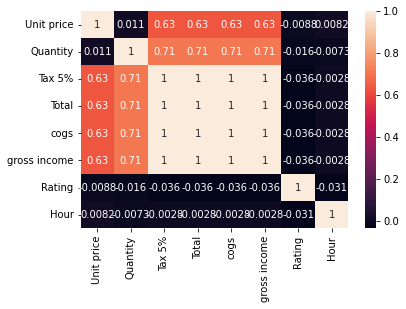

In [23]:
sns.heatmap(df.corr(), annot=True)

**Data Visualisation**


array([[<AxesSubplot:title={'center':'cogs'}>]], dtype=object)

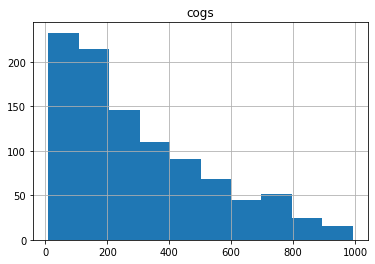

In [24]:
df.hist(column = "cogs")

# Below graph shows count of females and males is almost same

In [25]:
print(df.shape)
df['Gender'].value_counts()

(1000, 15)


Female    501
Male      499
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

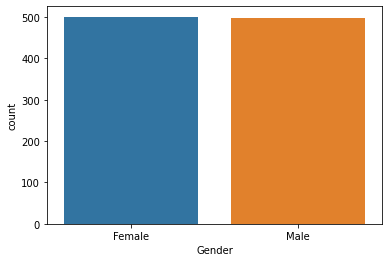

In [26]:
sns.countplot('Gender' , data = df)

**Creating dummies for Gender column for getting numeric data for seaborn bar plot**

In [27]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


**Joining original data frame (df) with gender dummies data frame (gender_dummies)**

In [28]:
df = pd.concat([df, gender_dummies], axis = 1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross income,Rating,Hour,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2022-11-09 13:08:00,Ewallet,522.83,26.1415,9.1,13,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2022-11-09 10:29:00,Cash,76.40,3.8200,9.6,10,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2022-11-09 13:23:00,Credit card,324.31,16.2155,7.4,13,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2022-11-09 20:33:00,Ewallet,465.76,23.2880,8.4,20,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2022-11-09 10:37:00,Ewallet,604.17,30.2085,5.3,10,0,1


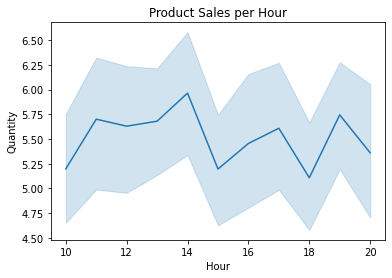

In [29]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

# **Product Analysis**

Let's look at the various products' performance.

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

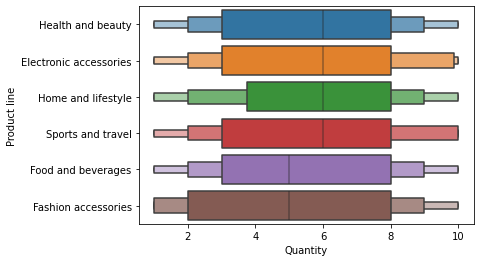

In [30]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

From the above visual, Health and Beauty,Electronic accessories, Home and lifestyle, Sports and travel have a better average quantity sales

<AxesSubplot:xlabel='count', ylabel='Product line'>

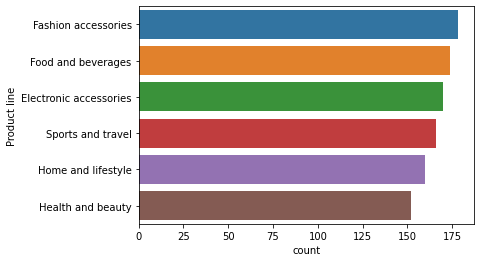

In [31]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

The above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

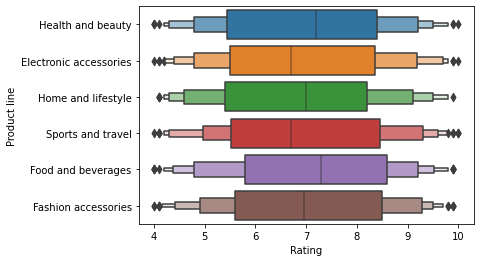

In [32]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=df )

Food and Beverages have the highest average rating while sports and travel the lowest.

<AxesSubplot:xlabel='Product line', ylabel='Female'>

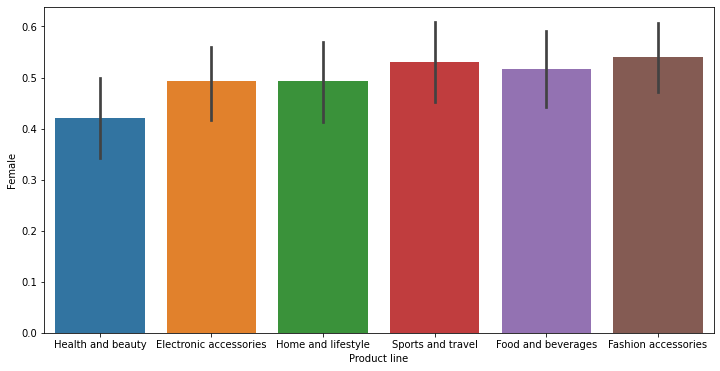

In [33]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df)

Popularity of different product lines in female category.

# Plotting Customers per city

In [34]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,City
Yangon,340
Mandalay,332
Naypyitaw,328


<AxesSubplot:ylabel='City'>

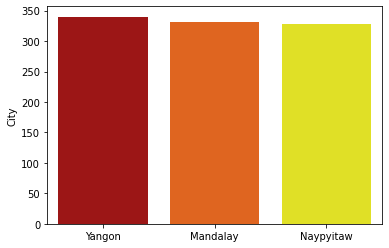

In [35]:
sns.barplot(x = place_df.index  , y = place_df['City'], palette = 'hot')

# Plotting different payment methods count

In [36]:
payment_df = pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


<AxesSubplot:ylabel='Payment'>

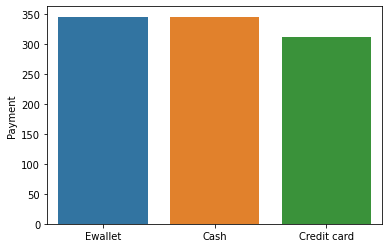

In [37]:
sns.barplot(x =payment_df.index , y = payment_df.Payment)

# Getting Gross Income Plot for each product line

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

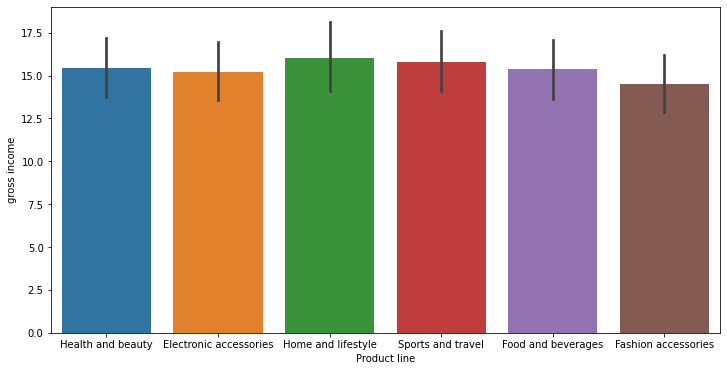

In [38]:
plt.figure(figsize= (12,6))
sns.barplot(x = df['Product line'], y = df['gross income'])

# Getting Rating Plot for each product line

([<matplotlib.axis.XTick at 0x7fb0a38cae90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

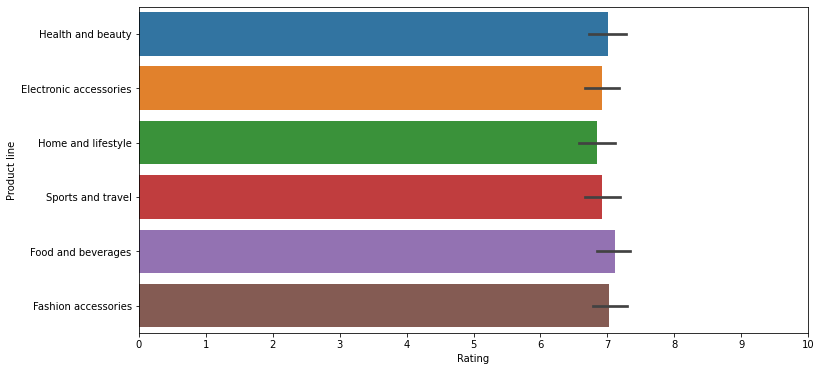

In [39]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(xdata)

# Total bill in each product line

<AxesSubplot:xlabel='Total', ylabel='Product line'>

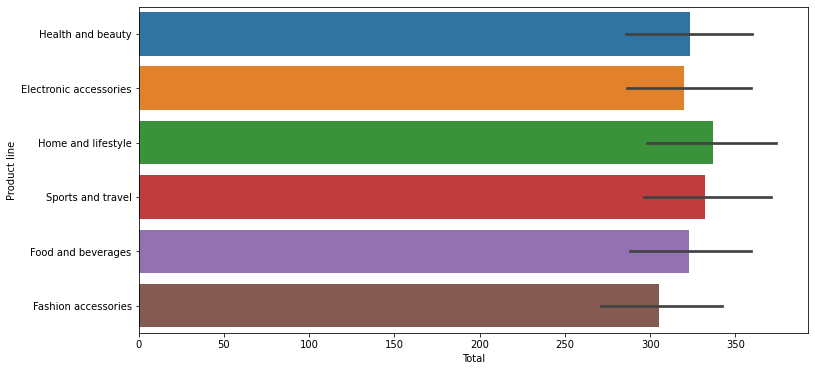

In [40]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Total'] , y = df['Product line'])

**Exploring Quantity Column**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7fb0a3868290>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

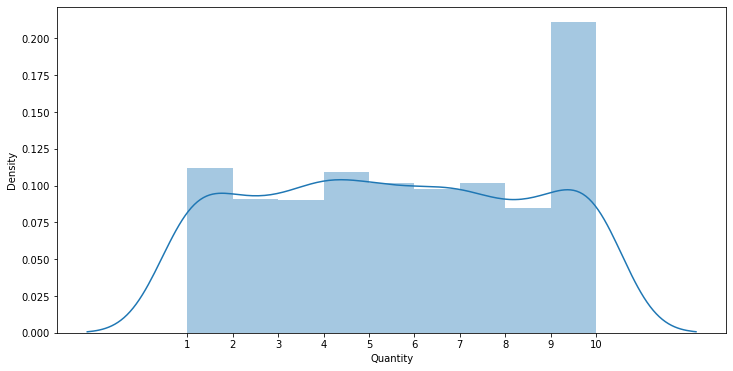

In [41]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'])
plt.xticks(xdata)

In [42]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
quantity_df

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:ylabel='Quantity'>

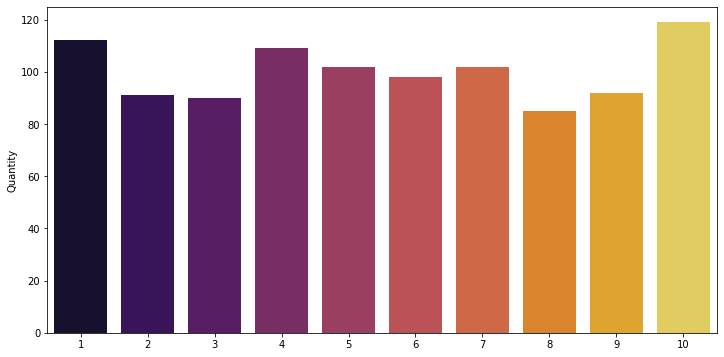

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x = quantity_df.index , y = quantity_df['Quantity'] , palette = 'inferno')